In [101]:
library(readxl)
library(ggplot2)
library("FactoMineR")
library(tidyverse) #data Manipulation
library(cluster) #Clustering algorithms
library(factoextra)#Clustering Algorithms & Visualization
library(gridExtra)
#install.packages("dendextend")
#install.packages("ggplot2")
#install.packages("rlang")
library(dendextend) # For fancy deprograms
library(rlang) # clustering cutting
library("np") #npreg: you may need to install it
library(PerformanceAnalytics)
library(psych)
#install.packages('fmsb')
library(fmsb) #For Spider Plots
#install.packages('countrycode')
library(countrycode)
#install.packages(c('hrbrthemes','viridis'))
#library(hrbrthemes)
#library(viridis)
#install.packages('GGally')
library(GGally)
library(dplyr)
library(ggmap)
library(leaflet)
library(htmltools)
library(dplyr) #getMap()
library(rgeos)
#install.packages('rworldmap')
library(rworldmap) #joinCountryData2Map
library(grid)
library(tidyr)
#install.packages(c("cowplot", "googleway", "ggplot2", "ggrepel", "ggspatial", "sf", "rnaturalearth", "rnaturalearthdata"))
library("sf")
library("rnaturalearth")
library("rnaturalearthdata")
#install.packages('writexl')
library(writexl)
library("RColorBrewer")

     spring            well        piped_to_yard_tap piped_to_dwelling
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000    Min.   :0.0000   
 1st Qu.:0.1478   1st Qu.:0.2078   1st Qu.:0.3074    1st Qu.:0.5029   
 Median :0.2903   Median :0.4373   Median :0.4847    Median :0.6107   
 Mean   :0.3073   Mean   :0.4149   Mean   :0.4561    Mean   :0.6183   
 3rd Qu.:0.3904   3rd Qu.:0.5746   3rd Qu.:0.6014    3rd Qu.:0.7535   
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000    Max.   :1.0000   
 natural_commodity
 Min.   :0.0000   
 1st Qu.:0.1961   
 Median :0.2597   
 Mean   :0.3146   
 3rd Qu.:0.3911   
 Max.   :1.0000   

spring,well,piped_to_yard_tap,piped_to_dwelling,natural_commodity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.37860811,0.605463098,0.4398335,0.5169148,0.3941817
0.13749969,0.167962452,0.1735878,0.8503785,0.3456190
0.42380360,0.623349194,0.5138432,0.6639956,0.4389021
0.00000000,0.002252355,0.1151604,0.9899718,0.0000000
0.21570203,0.204107962,0.4847073,0.7011008,0.2276693
0.08900233,0.164533875,0.2832823,0.0000000,0.1961307


clusters,spring,well,piped_to_yard_tap,piped_to_dwelling,natural_commodity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.42261440,0.5771305,0.5277906,0.4917625,0.2681870
2,0.08020689,0.1625267,0.1288814,0.9028363,0.2491685
3,0.24083279,0.2870350,0.6296311,0.7191662,0.2689720
4,0.15885276,0.1745847,0.2440369,0.6835002,0.7160801


[1] "#E41A1C" "#377EB8" "#4DAF4A" "#984EA3" "#FF7F00" "#FFFF33" "#A65628"

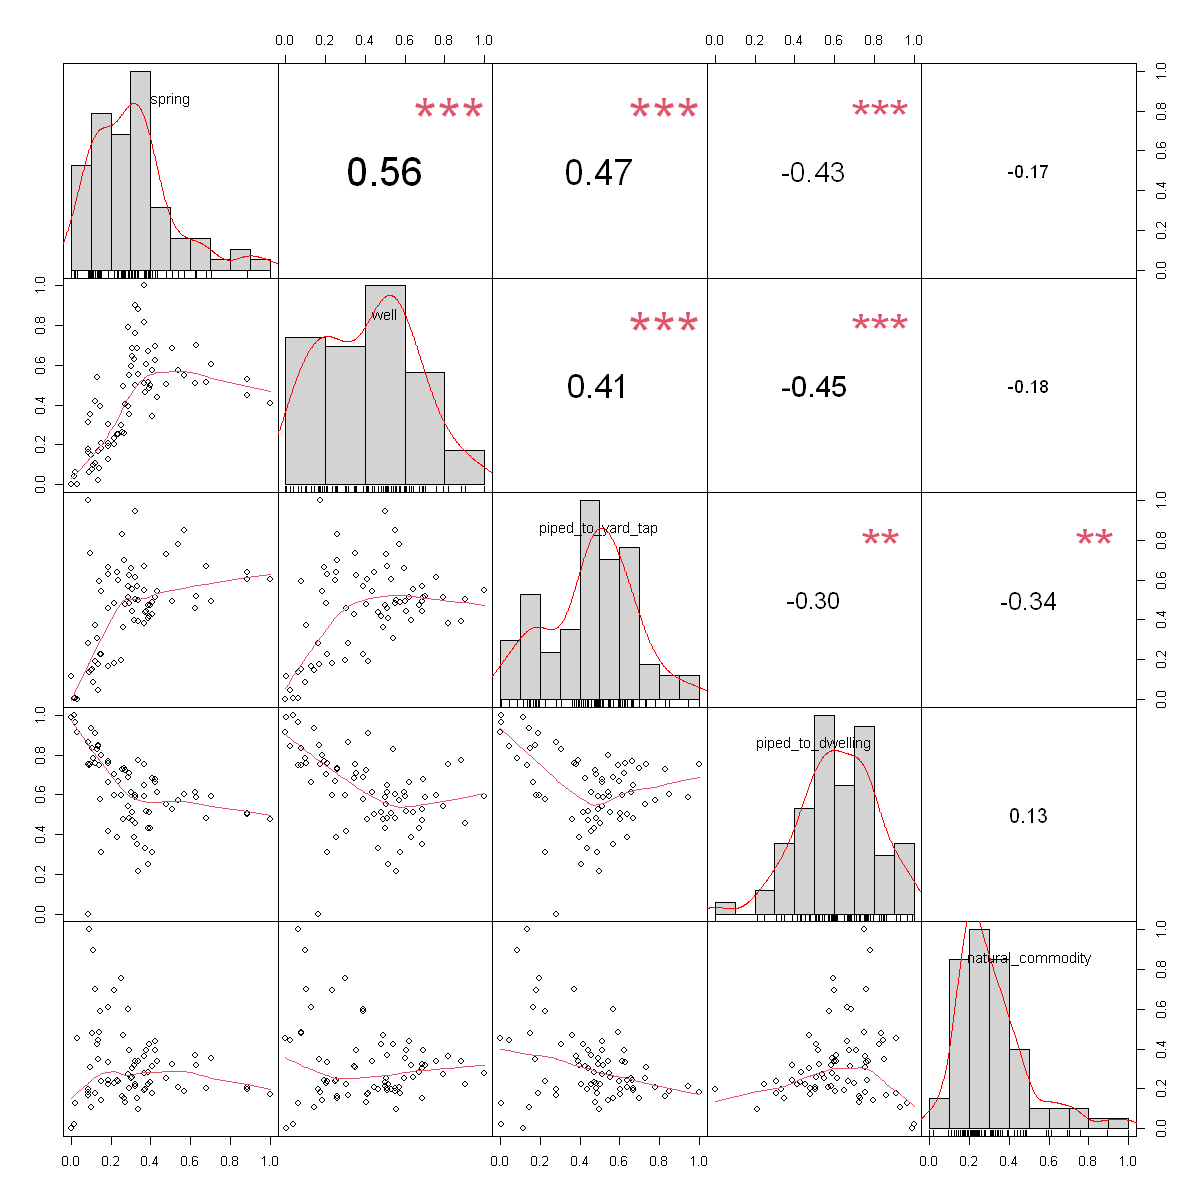

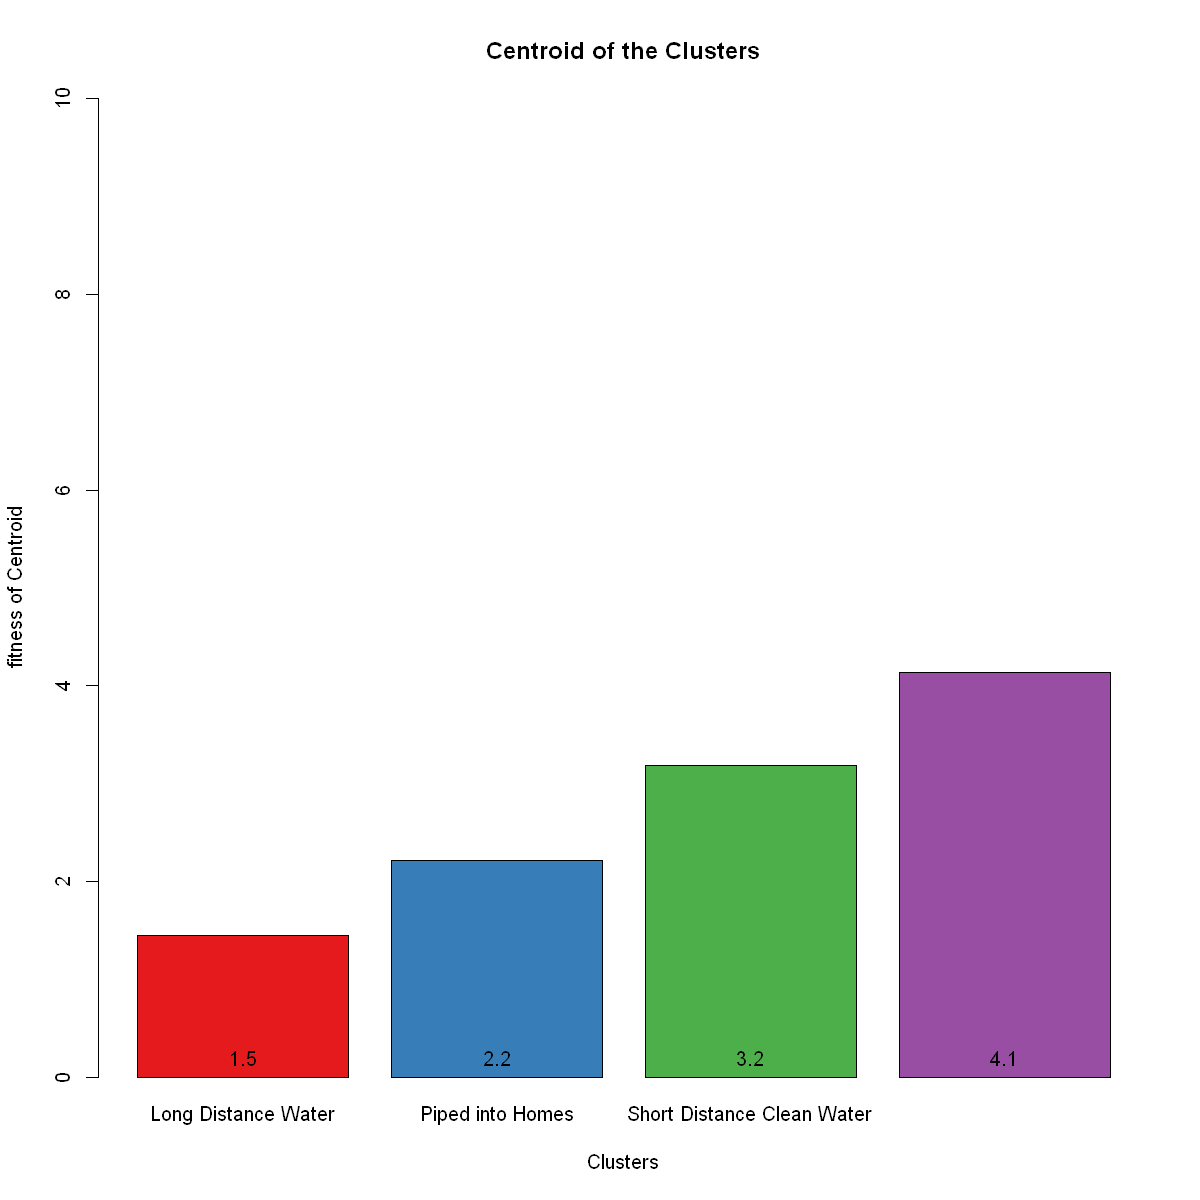

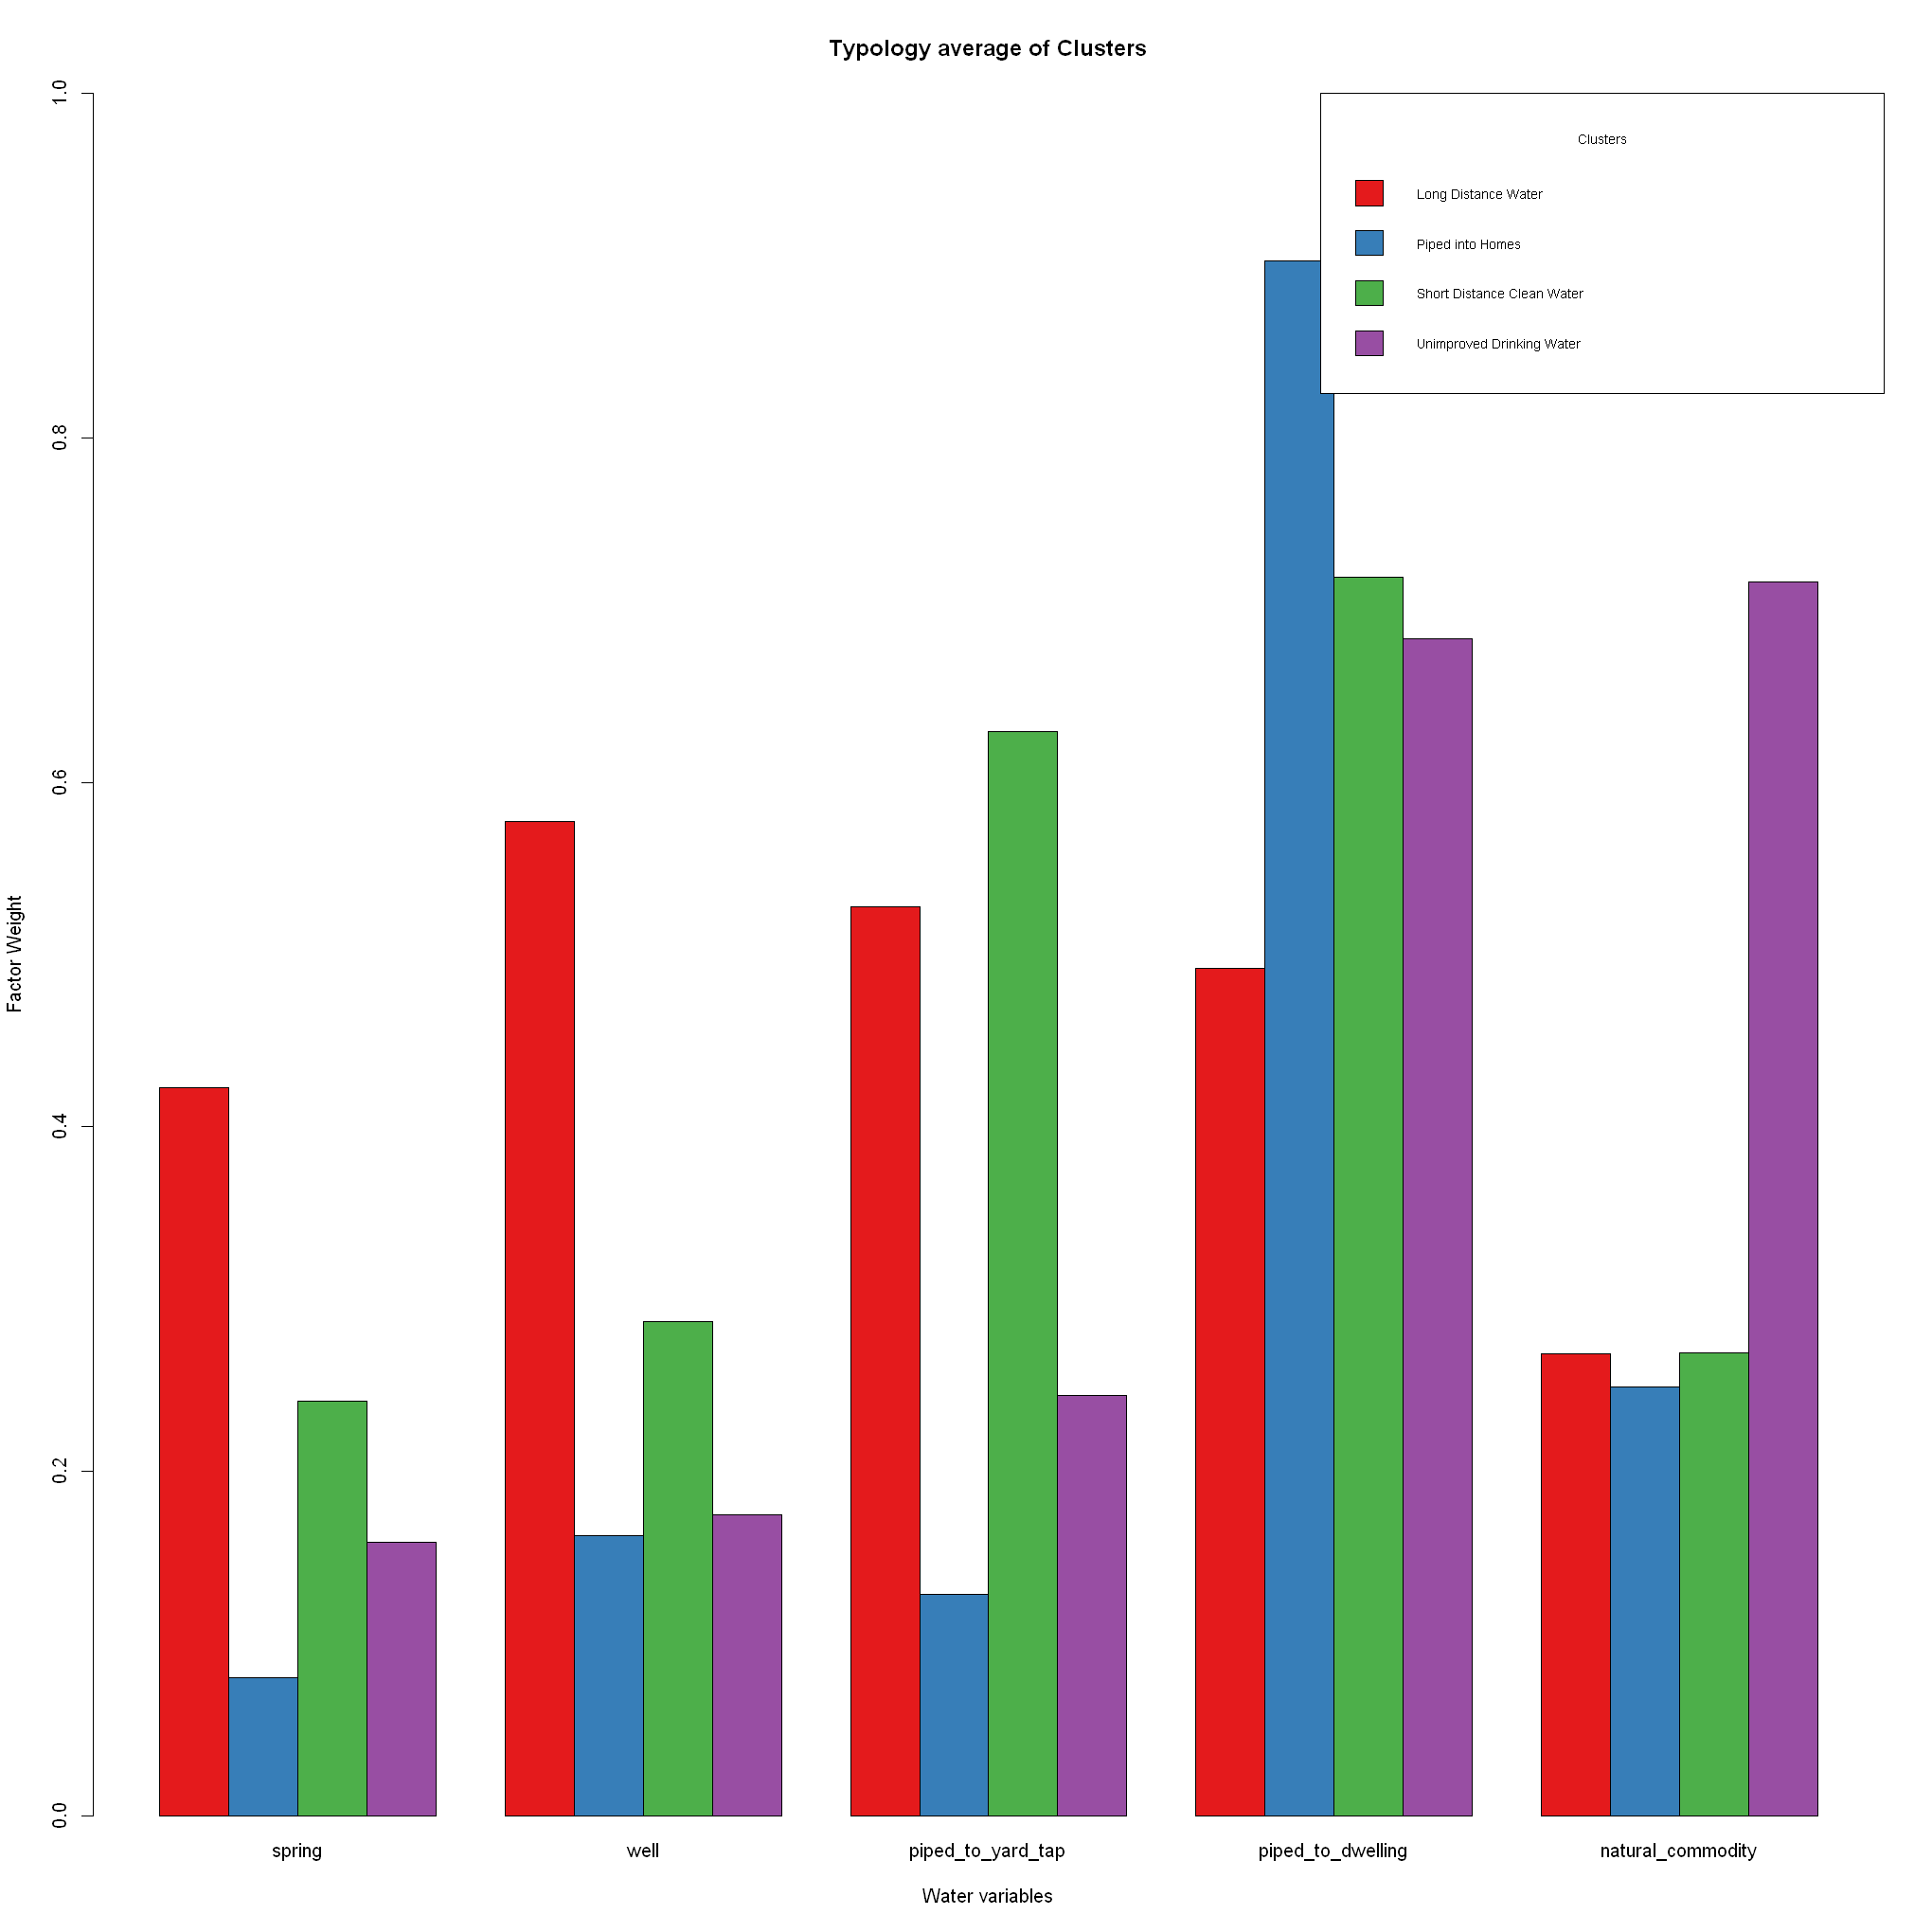

In [102]:
df.wa.fa <- read_excel("../../results/df-five-scores.xlsx",sheet=1)
dfsimple <- read_excel("../../results/dfsimple.xlsx",sheet=1)
df <- df.wa.fa[,c(2:6)]
df <- df %>% 
  rename(
      piped_to_dwelling= ML1,
      piped_to_yard_tap= ML2,
      spring= ML3,
      natural_commodity= ML4,
      well= ML5
     )

options(repr.plot.width=10, repr.plot.height=10)                  
old.par <- par(mar = c(0, 0, 0, 0))
par(old.par)
summary(df)
head(df)
chart.Correlation(df, histogram=TRUE, pch=19 , tl.cex = .7 )
# Create data: Water Accessibility Aggregate
df.wa.aggregate <- aggregate(df, list(clusters=dfsimple$clusters), mean)
df.wa.avg <- df.wa.aggregate[,1:6]
df.wa.avg

# Set1 easy to see '#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00'
brewer.pal(n = 7, name = "Set1") # Best color scheme is Set1 

#barplots to recognize the distribution
centroid <- apply(df.wa.aggregate, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the centroid of the cluster
                  
bp <- barplot(centroid,
        main = "Centroid of the Clusters", xlab = "Clusters", ylab = "fitness of Centroid",
        col = c('#E41A1C','#377EB8','#4DAF4A','#984EA3'),
        ylim = c(0, 10), names.arg = c("Long Distance Water", "Piped into Homes", "Short Distance Clean Water","Unimproved Drinking Water "))
text(bp, 0, round(centroid, 1),cex=1,pos=3)
options(repr.plot.width=17, repr.plot.height=17)
barplot(as.matrix(abs(df.wa.avg[,c(2:6)])),
        beside = TRUE,
        main = "Typology average of Clusters", xlab = "Water variables", ylab = "Factor Weight",
        col = c('#E41A1C','#377EB8','#4DAF4A','#984EA3'),
        legend = c("Long Distance Water", "Piped into Homes", "Short Distance Clean Water","Unimproved Drinking Water "), 
        args.legend = list(title = "Clusters", x = "topright", cex = .7), ylim = c(0, 1))
                  


centroiddf.wa <- apply(df, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the cen-troid of the cluster


,spring,well,piped_to_yard_tap,piped_to_dwelling,natural_commodity
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.00000000,1.0000000,1.0000000,1.0000000,1.0000000
2,0.00000000,0.0000000,0.0000000,0.0000000,0.0000000
3,0.42261440,0.5771305,0.5277906,0.4917625,0.2681870
4,0.08020689,0.1625267,0.1288814,0.9028363,0.2491685
5,0.24083279,0.2870350,0.6296311,0.7191662,0.2689720
6,0.15885276,0.1745847,0.2440369,0.6835002,0.7160801


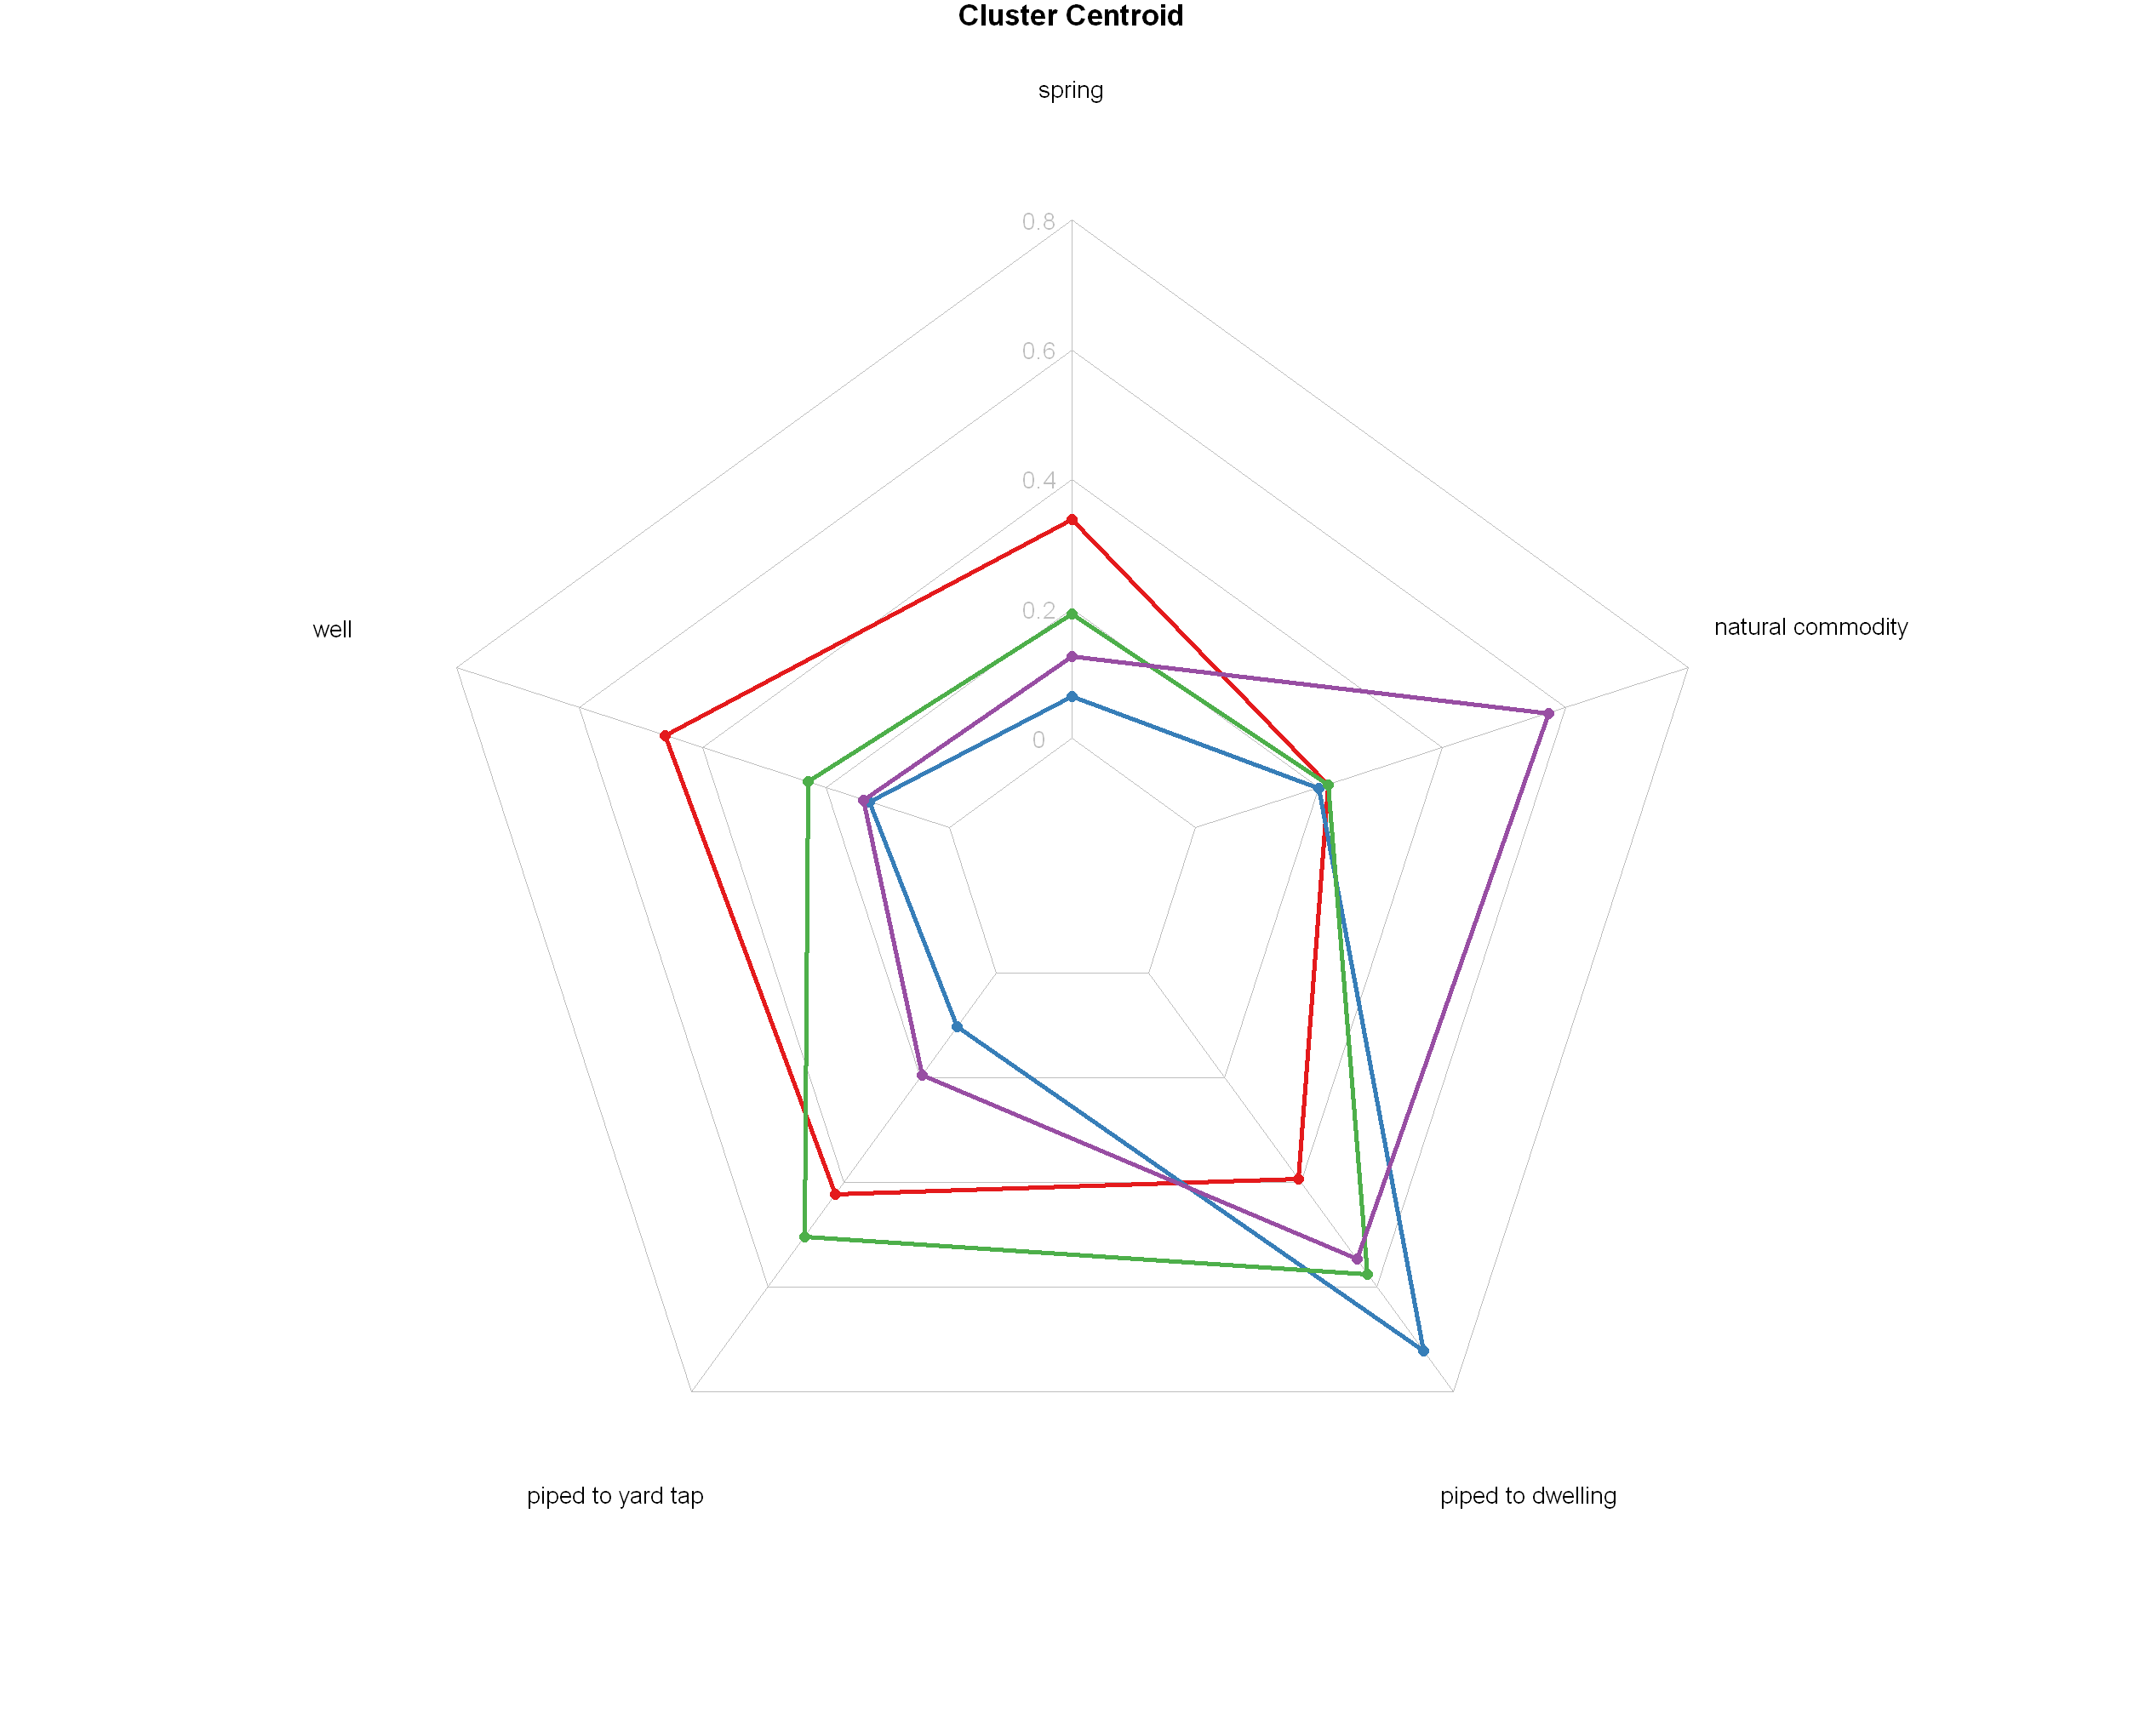

In [103]:
data.spider <- rbind(rep(1,1) , rep(0,1) , df.wa.avg[,c(2:6)])

head(data.spider,7)
colnames(data.spider) <- c(                 
      "spring",
      "well",
      "piped to yard tap",
      "piped to dwelling",
      "natural commodity"
)                       
options(repr.plot.width=21, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=1.4)

# The default radar chart for First Cluster
r.c. <- radarchart(data.spider,
           #custom polygon
           pcol= c('#E41A1C','#377EB8','#4DAF4A','#984EA3' ) ,
           plwd=4 , plty=1,
           #custom the grid
           cglcol="grey", cglty=1, axislabcol="grey", caxislabels= seq(0,1,.2), cglwd=0.8, axistype = 4,
           title = 'Cluster Centroid',
           vlcex=1,
           calcex = 1 ,
                   
           )

# Box Plot of Water Accessibility Variables (Violin Plots)

spring,well,piped_to_yard_tap,piped_to_dwelling,natural_commodity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.42261440,0.5771305,0.5277906,0.4917625,0.2681870
0.08020689,0.1625267,0.1288814,0.9028363,0.2491685
0.24083279,0.2870350,0.6296311,0.7191662,0.2689720
0.15885276,0.1745847,0.2440369,0.6835002,0.7160801


[1] "factor" "factor" "factor" "factor" "factor"

,spring,well,piped_to_yard_tap,piped_to_dwelling,natural_commodity
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Long Distance Water,0.42261440,0.5771305,0.5277906,0.4917625,0.2681870
Piped into Homes,0.08020689,0.1625267,0.1288814,0.9028363,0.2491685
Short Distance Clean Water,0.24083279,0.2870350,0.6296311,0.7191662,0.2689720
Unimproved Drinking Water,0.15885276,0.1745847,0.2440369,0.6835002,0.7160801


Warning message:
"position_dodge requires non-overlapping x intervals"


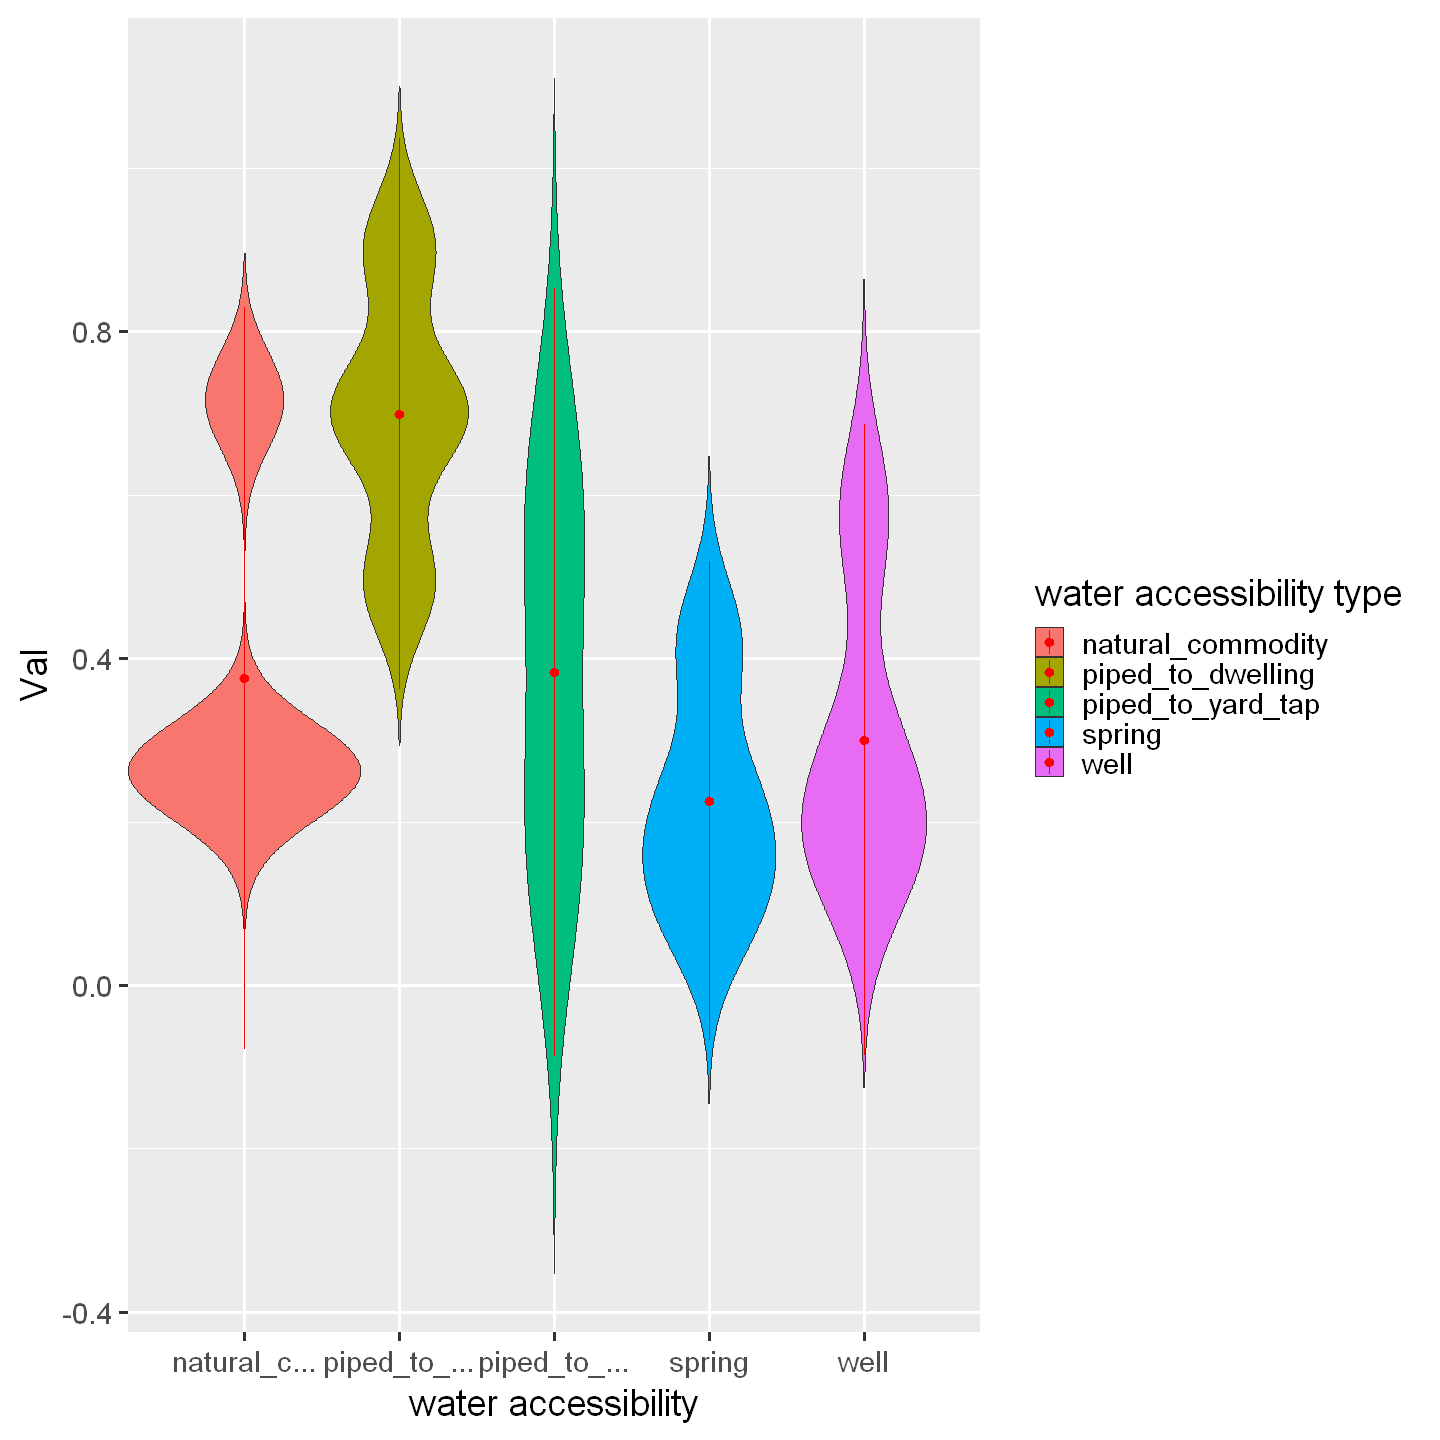

In [104]:
df.wa.aggregate <- aggregate(df, list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,2:6]
df.wa.aggregate
rownames(df.wa.aggregate) <- c("Long Distance Water", "Piped into Homes", "Short Distance Clean Water","Unimproved Drinking Water ")

data_wa_one <- df.wa.aggregate[  ,1:5]

df.wa.aggregate <- as.factor(df.wa.aggregate[,])
sapply(df.wa.aggregate, class)


options(repr.plot.width=12, repr.plot.height=12)
par(mar = c(1,1,1,1))
par(cex=5)

head(data_wa_one)

p <- data_wa_one %>% 
    gather(key="MesureType", value="Val") %>%
    ggplot( aes(x=MesureType, y=Val, fill=MesureType)) +
    geom_violin(trim=FALSE, width=1.5, size=.3) + 
    
    stat_summary(fun.data=mean_sdl, geom="pointrange", color="red") + 
    scale_color_brewer(palette="Set1") +
    xlab('water accessibility') +
    guides(fill =guide_legend("water accessibility type")) + 
    scale_x_discrete(label = function(x) stringr::str_trunc(x, 12))
p <- p + theme_grey(base_size = 22)
p 




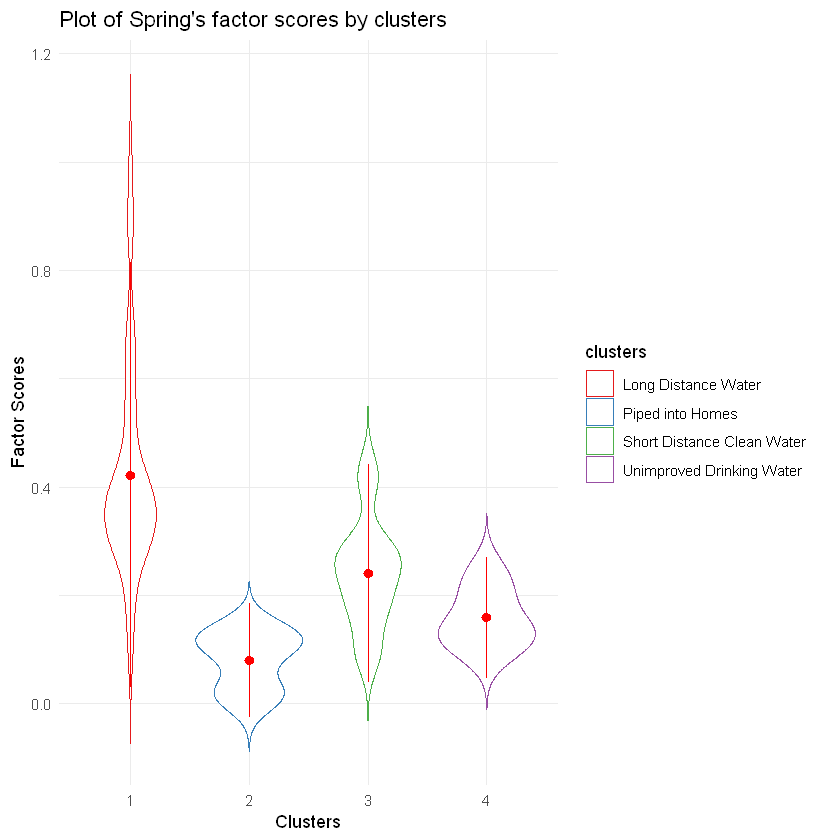

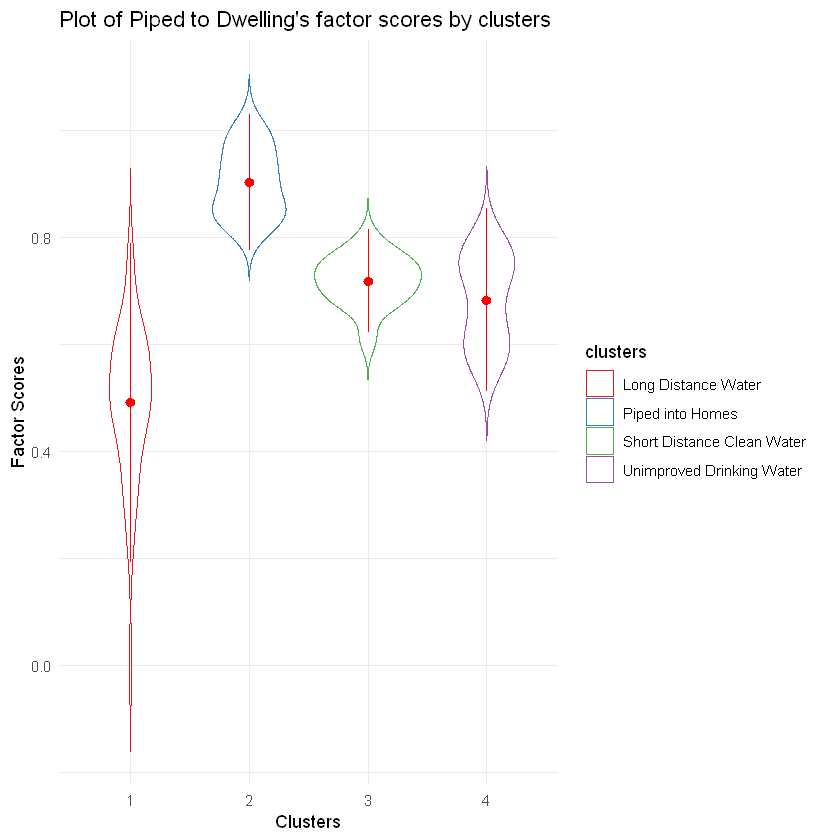

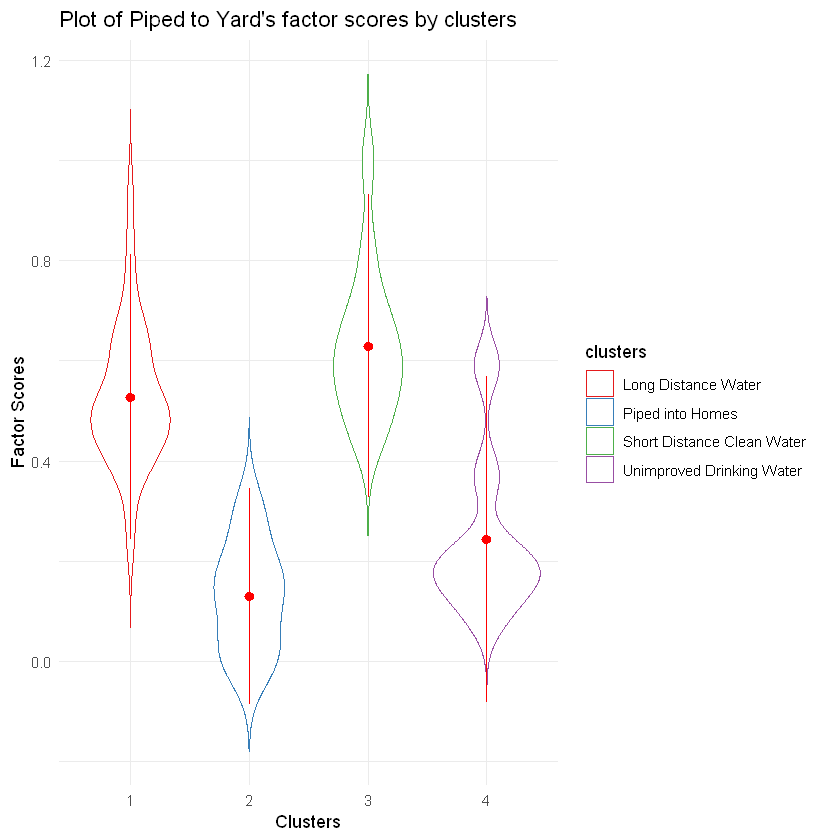

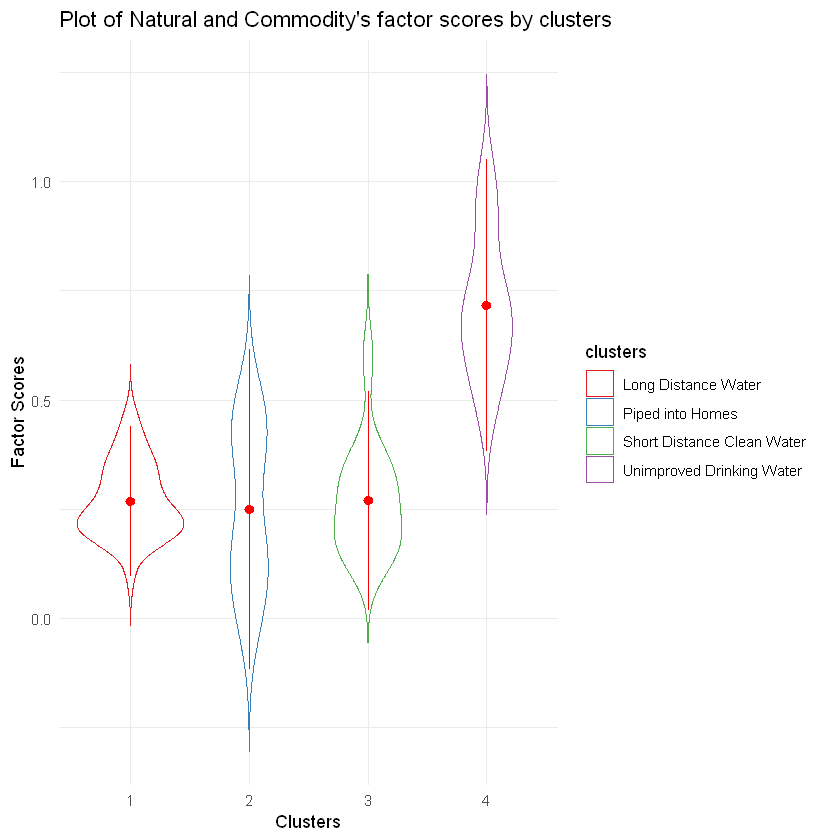

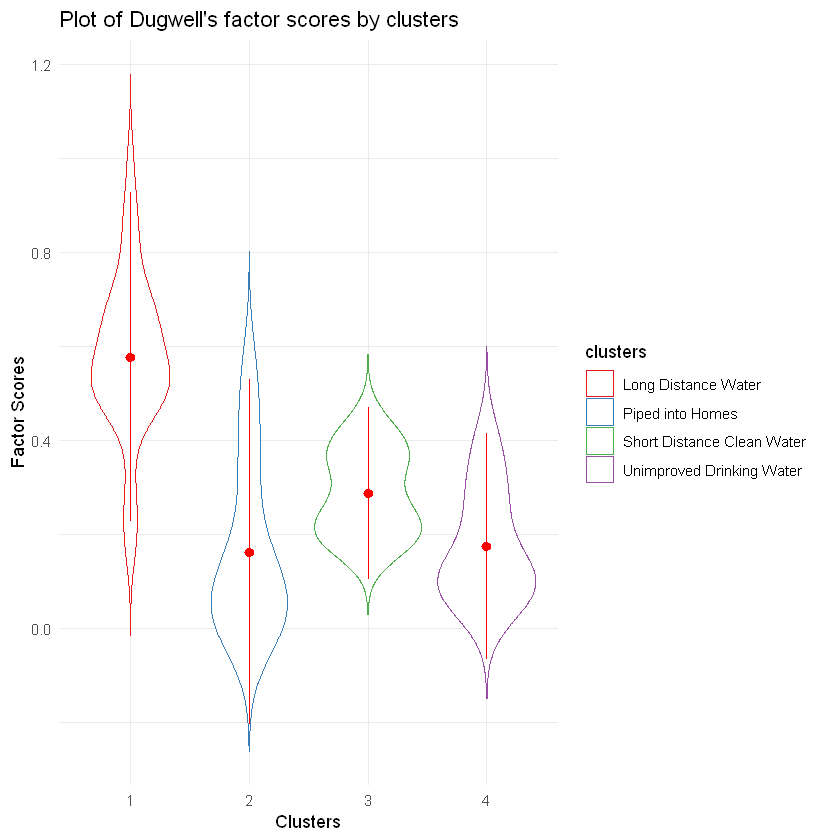

In [112]:
df.wa.fa <- read_excel("../../results/df-five-scores.xlsx",sheet=1)
df = read_excel('../../results/df-fa-five-cluster-rank.xlsx') #change name of file to sth descriptive (e.g. country-clusters)
dfc = df[, c(1,9)] # select only country name and cluster number
df <- df.wa.fa[,c(1:6)]
df <- df %>% 
  rename(
      piped_to_dwelling= ML1,
      piped_to_yard_tap= ML2,
      spring= ML3,
      natural_commodity= ML4,
      well= ML5
     )
dfv <- merge(x = dfc,
              y = df,
              by = c("Country"))

# Convert the variable dose from a numeric to a factor variable
dfv$clusters <- as.factor(dfv$clusters)

#Sizing
options(repr.plot.width=7, repr.plot.height=7)
par(mar = c(1,1,1,1))
par(cex=5)

# Basic violin plot for spring factor
p <- ggplot(dfv, aes(x=clusters, y=spring, color = clusters)) + 
  geom_violin(trim=FALSE) +
    stat_summary(fun.data=mean_sdl, 
                 geom="pointrange", color="red") +
labs(title="Plot of Spring's factor scores by clusters",x="Clusters", y = "Factor Scores") +
 theme_minimal() + 
 scale_color_manual(name = 'clusters', 
labels = c("Long Distance Water", "Piped into Homes", "Short Distance Clean Water","Unimproved Drinking Water "),
    values=c('#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00'))
p 
# Basic violin plot for piped_to_dwelling factor
p <- ggplot(dfv, aes(x=clusters, y=piped_to_dwelling, color = clusters)) + 
  geom_violin(trim=FALSE) +
    stat_summary(fun.data=mean_sdl, 
                 geom="pointrange", color="red") +
labs(title="Plot of Piped to Dwelling's factor scores by clusters",x="Clusters", y = "Factor Scores") +
 theme_minimal() + 
 scale_color_manual(name = 'clusters', 
labels = c("Long Distance Water", "Piped into Homes", "Short Distance Clean Water","Unimproved Drinking Water "),
    values=c('#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00'))
p 
# Basic violin plot for piped_to_yard_tap factor
p <- ggplot(dfv, aes(x=clusters, y=piped_to_yard_tap, color = clusters)) + 
  geom_violin(trim=FALSE) +
    stat_summary(fun.data=mean_sdl, 
                 geom="pointrange", color="red") +
labs(title="Plot of Piped to Yard's factor scores by clusters",x="Clusters", y = "Factor Scores") +
 theme_minimal() + 
 scale_color_manual(name = 'clusters', 
labels = c("Long Distance Water", "Piped into Homes", "Short Distance Clean Water","Unimproved Drinking Water "),
    values=c('#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00'))
p 
# Basic violin plot for natural_commodity factor
p <- ggplot(dfv, aes(x=clusters, y=natural_commodity, color = clusters)) + 
  geom_violin(trim=FALSE) +
    stat_summary(fun.data=mean_sdl, 
                 geom="pointrange", color="red") +
labs(title="Plot of Natural and Commodity's factor scores by clusters",x="Clusters", y = "Factor Scores") +
 theme_minimal() + 
 scale_color_manual(name = 'clusters', 
labels = c("Long Distance Water", "Piped into Homes", "Short Distance Clean Water","Unimproved Drinking Water "),
    values=c('#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00'))
p 
# Basic violin plot for piped_to_yard_tap factor
p <- ggplot(dfv, aes(x=clusters, y=well, color = clusters)) + 
  geom_violin(trim=FALSE) +
    stat_summary(fun.data=mean_sdl,  
                 geom="pointrange", color="red") +
labs(title="Plot of Dugwell's factor scores by clusters",x="Clusters", y = "Factor Scores") +
 theme_minimal() + 
 scale_color_manual(name = 'clusters', 
labels = c("Long Distance Water", "Piped into Homes", "Short Distance Clean Water","Unimproved Drinking Water "),
    values=c('#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00'))
p 

# Facet Graphs 

Warning message in dist(df):
"NAs introduced by coercion"


Country,spring,well,piped_to_yard_tap,piped_to_dwelling,natural_commodity,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Afghanistan,0.37860811,0.605463098,0.4398335,0.5169148,0.3941817,1
Albania,0.13749969,0.167962452,0.1735878,0.8503785,0.3456190,2
Angola,0.42380360,0.623349194,0.5138432,0.6639956,0.4389021,1
Armenia,0.00000000,0.002252355,0.1151604,0.9899718,0.0000000,2
Azerbaijan,0.21570203,0.204107962,0.4847073,0.7011008,0.2276693,3
Bangladesh,0.08900233,0.164533875,0.2832823,0.0000000,0.1961307,1



 1  2  3  4 
40 11 14  8 

clusters,spring,well,piped_to_yard_tap,piped_to_dwelling,natural_commodity
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.42261440,0.5771305,0.5277906,0.4917625,0.2681870
2,0.08020689,0.1625267,0.1288814,0.9028363,0.2491685
3,0.24083279,0.2870350,0.6296311,0.7191662,0.2689720
4,0.15885276,0.1745847,0.2440369,0.6835002,0.7160801


clusters            spring              well piped_to_yard_tap 
         "factor"         "numeric"         "numeric"         "numeric" 
piped_to_dwelling natural_commodity 
        "numeric"         "numeric"

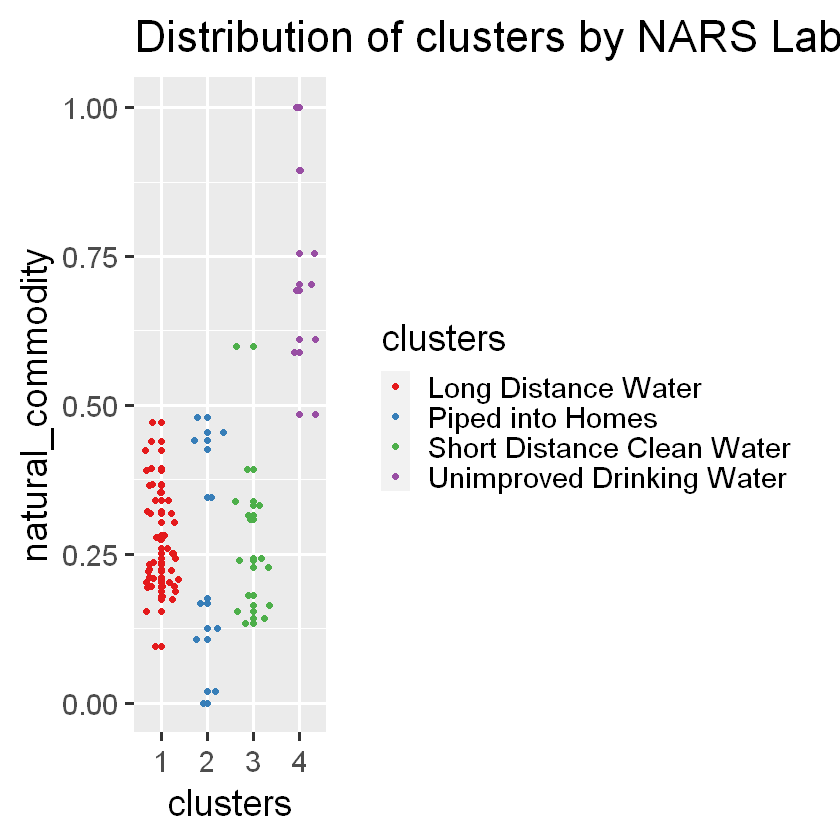

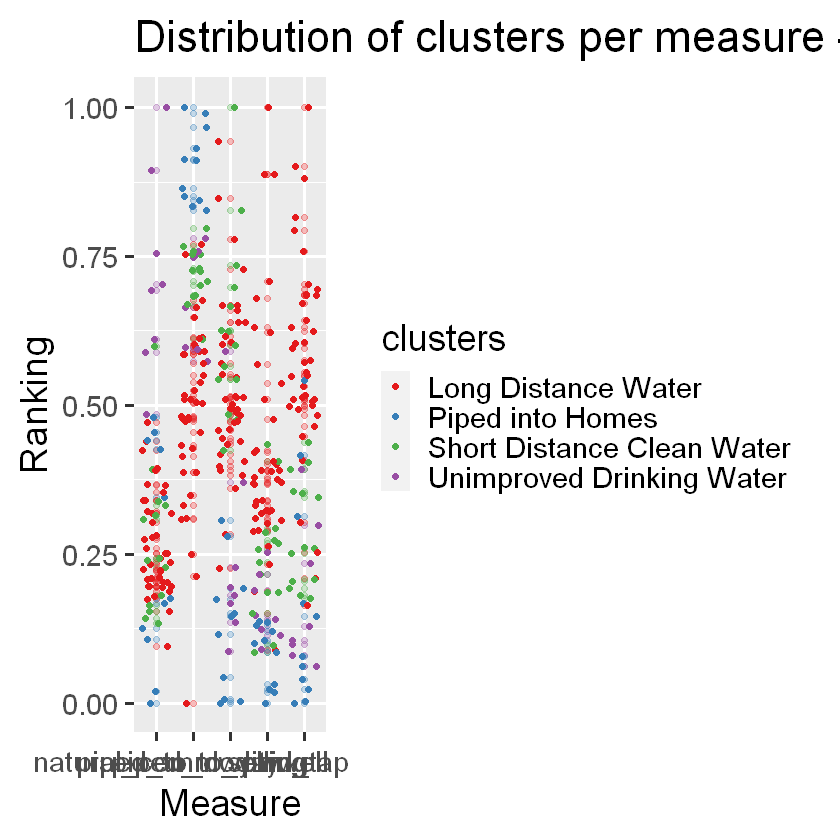

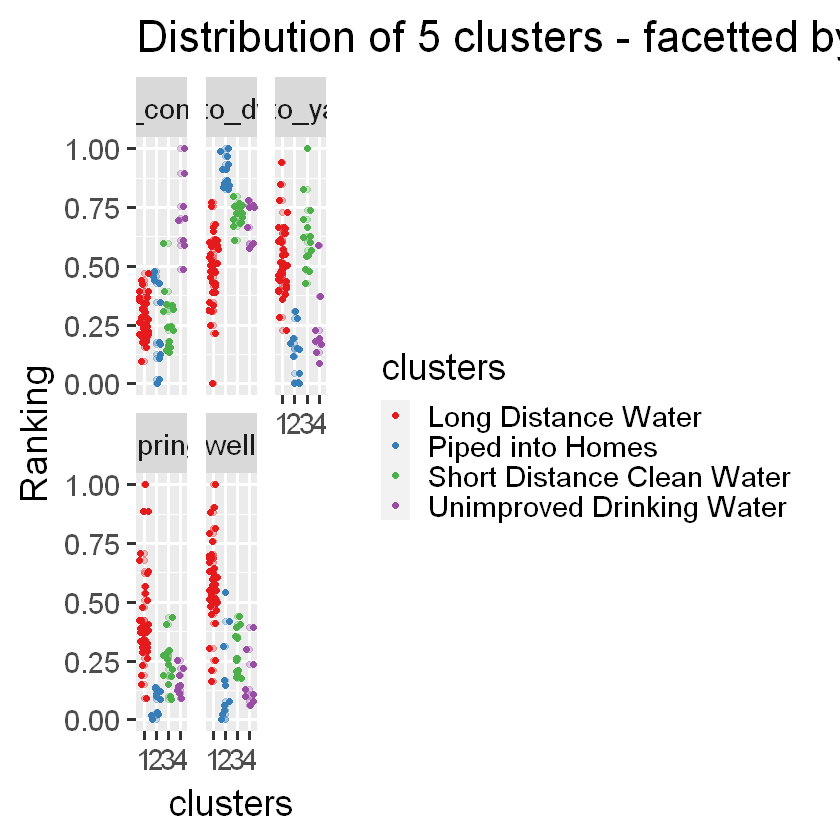

In [106]:
#data_wa$cluster <- cutree(hc.ward2,4) 
#head(df$clusters,7)
hc.ward2=hclust(dist(df), method ="ward.D2")
df$clusters <- cutree(hc.ward2,4)
df$clusters <- as.factor(df$clusters)
head(df)
p <- ggplot(df, aes(clusters, natural_commodity, color = clusters, fill = clusters)) +
  geom_point(alpha = 0.6) +
  geom_jitter() +
  geom_point() +
  ggtitle("Distribution of clusters by NARS Lab") +
  scale_color_manual(name = 'clusters', labels = c("Long Distance Water", "Piped into Homes", "Short Distance Clean Water","Unimproved Drinking Water "),values=c('#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00') )
p <- p + theme_grey(base_size = 22) 
p + scale_fill_discrete(name = 'clusters', labels = c("Long Distance Water", "Piped into Homes", "Short Distance Clean Water","Unimproved Drinking Water "))

table(df$clusters)

#Group by the cluster assignment and calculate averages
df_clus_avg <- df %>%
  group_by(clusters) %>%
  summarize_if(is.numeric, mean, na.rm=TRUE)


head(df_clus_avg,7) 

sapply(df_clus_avg, class)
#Create a parallel coordinate plot of the values:
ggparcoord <- ggparcoord(df_clus_avg, columns = c(2:6), 
           groupColumn = "clusters", scale = "globalminmax", order = "skewness") +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) + geom_point(color = "#00AFBB") 
    
#make a dot plot
countries_gathered <- df %>% gather(Measure, Ranking, spring:natural_commodity) 

g <- ggplot(countries_gathered, aes(Measure, Ranking, color = clusters )) +
  geom_point(alpha = 0.3) +
  geom_jitter() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  ggtitle("Distribution of clusters per measure - 5 clusters") 
   
g <- g + theme_grey(base_size = 22) +  scale_color_manual(name = 'clusters', labels = c("Long Distance Water", "Piped into Homes", "Short Distance Clean Water","Unimproved Drinking Water "),values=c('#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00')) 
g 
countries_gathered %>% 

ggplot(aes(clusters, Ranking, col = clusters)) +
  geom_point(alpha = 0.3) +
  geom_jitter() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  ggtitle("Distribution of 5 clusters - facetted by measure") +
  facet_wrap(~Measure) +
 theme_grey(base_size = 22) +  
scale_color_manual(name = 'clusters', labels = c("Long Distance Water", "Piped into Homes", "Short Distance Clean Water","Unimproved Drinking Water "),values=c('#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00'))
# set the set factor as for the clusters


# Ranking

In [107]:
df.wa <- read_excel("../../results/df-five-scores.xlsx",sheet=1)
df.wa <- df.wa %>% 
  rename(
      piped_to_dwelling= ML1,
      piped_to_yard_tap= ML2,
      spring= ML3,
      natural_commodity= ML4,
      well= ML5
     )
# clean df at next save (2 cluster columns - only 1 needed; etc) #df also needs to be only water accessibility variables

df.wa["norm"] <- apply(df.wa[2:6], 1, function(x) sqrt(sum(x^2)) ) #assuming columns 5:10 are the water accessibility variables
# Ideally, df should just be the countries and the water access. variables ONLY. This, way, the code should then be:
# df["norm"] <- apply(df, 1, function(x) sqrt(sum(x^2)) )
                       
df.wa["distToCentroid"] = 0 # initialize
                       
df.wa$clusters <- as.factor(dfsimple$clusters)
#Turn into numeric to find centroids
                       
# assuming centroiddf.wa is your vector of cluster centroids

# copied this from your earlier notebook
df.wa.aggregate <- aggregate(df.wa[,c(2:6)], list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,c(1:5)]
centroiddf.wa <- apply(df.wa.aggregate, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the cen-troid of the cluster

head(centroiddf.wa)       
                       
                       
df.wa$clusters <- dfsimple$clusters                      
df <- df.wa
                       
# Then here, you compute the distance to centroid cluster by cluster
df[df$clusters == 1, "distToCentroid"] = abs(df[df$clusters == 1, "norm"] - centroiddf.wa[1])
df[df$clusters == 2, "distToCentroid"] = abs(df[df$clusters == 2, "norm"] - centroiddf.wa[2])
df[df$clusters == 3, "distToCentroid"] = abs(df[df$clusters == 3, "norm"] - centroiddf.wa[3])
df[df$clusters == 4, "distToCentroid"] = abs(df[df$clusters == 4, "norm"] - centroiddf.wa[4])
df[df$clusters == 5, "distToCentroid"] = abs(df[df$clusters == 5, "norm"] - centroiddf.wa[5])
#df[df$clusters == 6, "distToCentroid"] = abs(df[df$clusters == 6, "norm"] - centroiddf.wa[6])                       

head(df,7)
write_xlsx(df , '../../results/df-fa-five-cluster-rank.xlsx')
# You can then sort each subset by the size of "distToCentroid"
df1 = df %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1, 8, 9)
head(df1)
cluster.one <- subset(df1, clusters == 1 )
cluster.two <- subset(df1, clusters == 2 )
cluster.three <- subset(df1, clusters == 3 )
cluster.four <- subset(df1, clusters == 4 )
cluster.five <- subset(df1, clusters == 5 )
#cluster.six <- subset(df1, clusters == 6 )
head(cluster.one)
summary(cluster.one)
                       
cluster.one %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
cluster.two %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
cluster.three %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
cluster.four %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
   arrange_at("clusters") %>%
 select(1:3)
#cluster.five %>% 
# arrange_at("Country", desc) %>%
#  arrange_at("distToCentroid") %>%
# arrange_at("clusters") %>%
# select(1:3)
#cluster.six %>% 
  #arrange_at("Country", desc) %>%
  # arrange_at("distToCentroid") %>%
  # arrange_at("clusters") %>%
# select(1:3)

[1] 1.425509 2.205577 3.170808 4.072154

Country,spring,well,piped_to_yard_tap,piped_to_dwelling,natural_commodity,norm,distToCentroid,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,0.37860811,0.605463098,0.4398335,0.5169148,0.3941817,1.0611142,0.3643948,1
Albania,0.13749969,0.167962452,0.1735878,0.8503785,0.3456190,0.9590862,1.2464912,2
Angola,0.42380360,0.623349194,0.5138432,0.6639956,0.4389021,1.2106749,0.2148341,1
Armenia,0.00000000,0.002252355,0.1151604,0.9899718,0.0000000,0.9966499,1.2089275,2
Azerbaijan,0.21570203,0.204107962,0.4847073,0.7011008,0.2276693,0.9308621,2.2399461,3
Bangladesh,0.08900233,0.164533875,0.2832823,0.0000000,0.1961307,0.3920573,1.0334517,1
Benin,0.30931807,0.684446102,0.4443814,0.4720580,0.3025272,1.0372947,0.3882142,1


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Niger,0.06088683,1
Burundi,0.08871871,1
Mauritania,0.10130861,1
Sao Tome and Principe,0.10617824,1
Congo Democratic Republic,0.11085961,1
Rwanda,0.12417417,1


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Niger,0.06088683,1
Burundi,0.08871871,1
Mauritania,0.10130861,1
Sao Tome and Principe,0.10617824,1
Congo Democratic Republic,0.11085961,1
Rwanda,0.12417417,1


   Country          distToCentroid       clusters
 Length:40          Min.   :0.06089   Min.   :1  
 Class :character   1st Qu.:0.16642   1st Qu.:1  
 Mode  :character   Median :0.27249   Median :1  
                    Mean   :0.34283   Mean   :1  
                    3rd Qu.:0.48164   3rd Qu.:1  
                    Max.   :1.03345   Max.   :1  

Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Niger,0.06088683,1
Burundi,0.08871871,1
Mauritania,0.10130861,1
Sao Tome and Principe,0.10617824,1
Congo Democratic Republic,0.11085961,1
Rwanda,0.12417417,1
Eritrea,0.14147716,1
Gambia,0.14857132,1
Madagascar,0.16088754,1


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Moldova,1.079446,2
Morocco,1.163790,2
Jordan,1.184866,2
Egypt,1.204430,2
Armenia,1.208928,2
Honduras,1.222860,2
Ukraine,1.226842,2
Colombia,1.229174,2
Peru,1.240530,2


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Bolivia,1.890750,3
Vietnam,1.994778,3
Gabon,1.998942,3
Senegal,2.014856,3
Comoros,2.049724,3
Kyrgyz Republic,2.083601,3
Kenya,2.092524,3
Nicaragua,2.092941,3
Turkmenistan,2.096091,3


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Dominican Republic,2.810926,4
Maldives,2.872208,4
Guyana,2.962193,4
Guatemala,2.989773,4
Yemen,3.016254,4
Indonesia,3.085892,4
Cambodia,3.122380,4
Philippines,3.127178,4


# World Map

Country,spring,well,piped_to_yard_tap,piped_to_dwelling,natural_commodity,norm,distToCentroid,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,0.37860811,0.605463098,0.4398335,0.5169148,0.3941817,1.0611142,0.3643948,1
Albania,0.13749969,0.167962452,0.1735878,0.8503785,0.3456190,0.9590862,1.2464912,2
Angola,0.42380360,0.623349194,0.5138432,0.6639956,0.4389021,1.2106749,0.2148341,1
Armenia,0.00000000,0.002252355,0.1151604,0.9899718,0.0000000,0.9966499,1.2089275,2
Azerbaijan,0.21570203,0.204107962,0.4847073,0.7011008,0.2276693,0.9308621,2.2399461,3
Bangladesh,0.08900233,0.164533875,0.2832823,0.0000000,0.1961307,0.3920573,1.0334517,1


Country,clusters
<chr>,<dbl>
Afghanistan,1
Albania,2
Angola,1
Armenia,2
Azerbaijan,3
Bangladesh,1
Benin,1


[1] 73  2

region,value
<chr>,<dbl>
Afghanistan,1
Albania,2
Angola,1
Armenia,2
Azerbaijan,3
Bangladesh,1


71 codes from your data successfully matched countries in the map
2 codes from your data failed to match with a country code in the map
172 codes from the map weren't represented in your data


[1] "scalerank"    "labelrank"    "featurecla"   "sovereignt"   "sov_a3"      
 [6] "adm0_dif"     "level"        "type"         "admin"        "adm0_a3"     
[11] "geou_dif"     "geounit"      "gu_a3"        "su_dif"       "subunit"     
[16] "su_a3"        "name"         "abbrev"       "postal"       "name_forma"  
[21] "terr_"        "name_sort"    "map_color"    "pop_est"      "gdp_md_est"  
[26] "fips_10_"     "iso_a2"       "iso_a3"       "iso_n3"       "iso3"        
[31] "lon"          "lat"          "iso3.1"       "admin.1"      "region"      
[36] "continent"    "geo3major"    "geo3"         "image24"      "glocaf"      
[41] "stern"        "sresmajor"    "sres"         "gbd"          "avoidnumeric"
[46] "avoidname"    "ldc"          "sid"          "lldc"         "region"      
[51] "value"        "admin.2"      "iso3.2"

[1] Afghanistan           Angola                Albania              
 [4] Armenia               Azerbaijan            Burundi              
 [7] Benin                 Burkina Faso          Bangladesh           
[10] Bolivia               Ivory Coast           Cameroon             
[13] Congo (Brazzaville)   Colombia              Dominican Rep.       
[16] Egypt                 Eritrea               Ethiopia             
[19] Gabon                 Ghana                 Guinea               
[22] Gambia                Guatemala             Guyana               
[25] Honduras              Haiti                 Indonesia            
[28] India                 Jordan                Kenya                
[31] Kyrgyzstan            Cambodia              Liberia              
[34] Lesotho               Morocco               Moldova              
[37] Madagascar            Mali                  Myanmar              
[40] Mozambique            Mauritania            Malawi               
[43] Namibia               Niger                 Nigeria              
[46] Nicaragua             Nepal                 Pakistan             
[49] Peru                  Philippines           Papua New Guinea     
[52] Rwanda                Senegal               Sierra Leone         
[55] Chad                  Togo                  Tajikistan           
[58] Turkmenistan          East Timor            Turkey               
[61] Tanzania              Uganda                Ukraine              
[64] Vietnam               Yemen                 South Africa         
[67] Zambia                Zimbabwe              Comoros              
[70] Maldives              Sao Tome and Principe
243 Levels: Afghanistan Aland Albania Algeria American Samoa Andorra ... Zimbabwe

[1] "Congo"                     "Congo Democratic Republic"
[3] "Cote d'Ivoire"             "Dominican Republic"       
[5] "Eswatini"                  "Kyrgyz Republic"          
[7] "Timor-Leste"

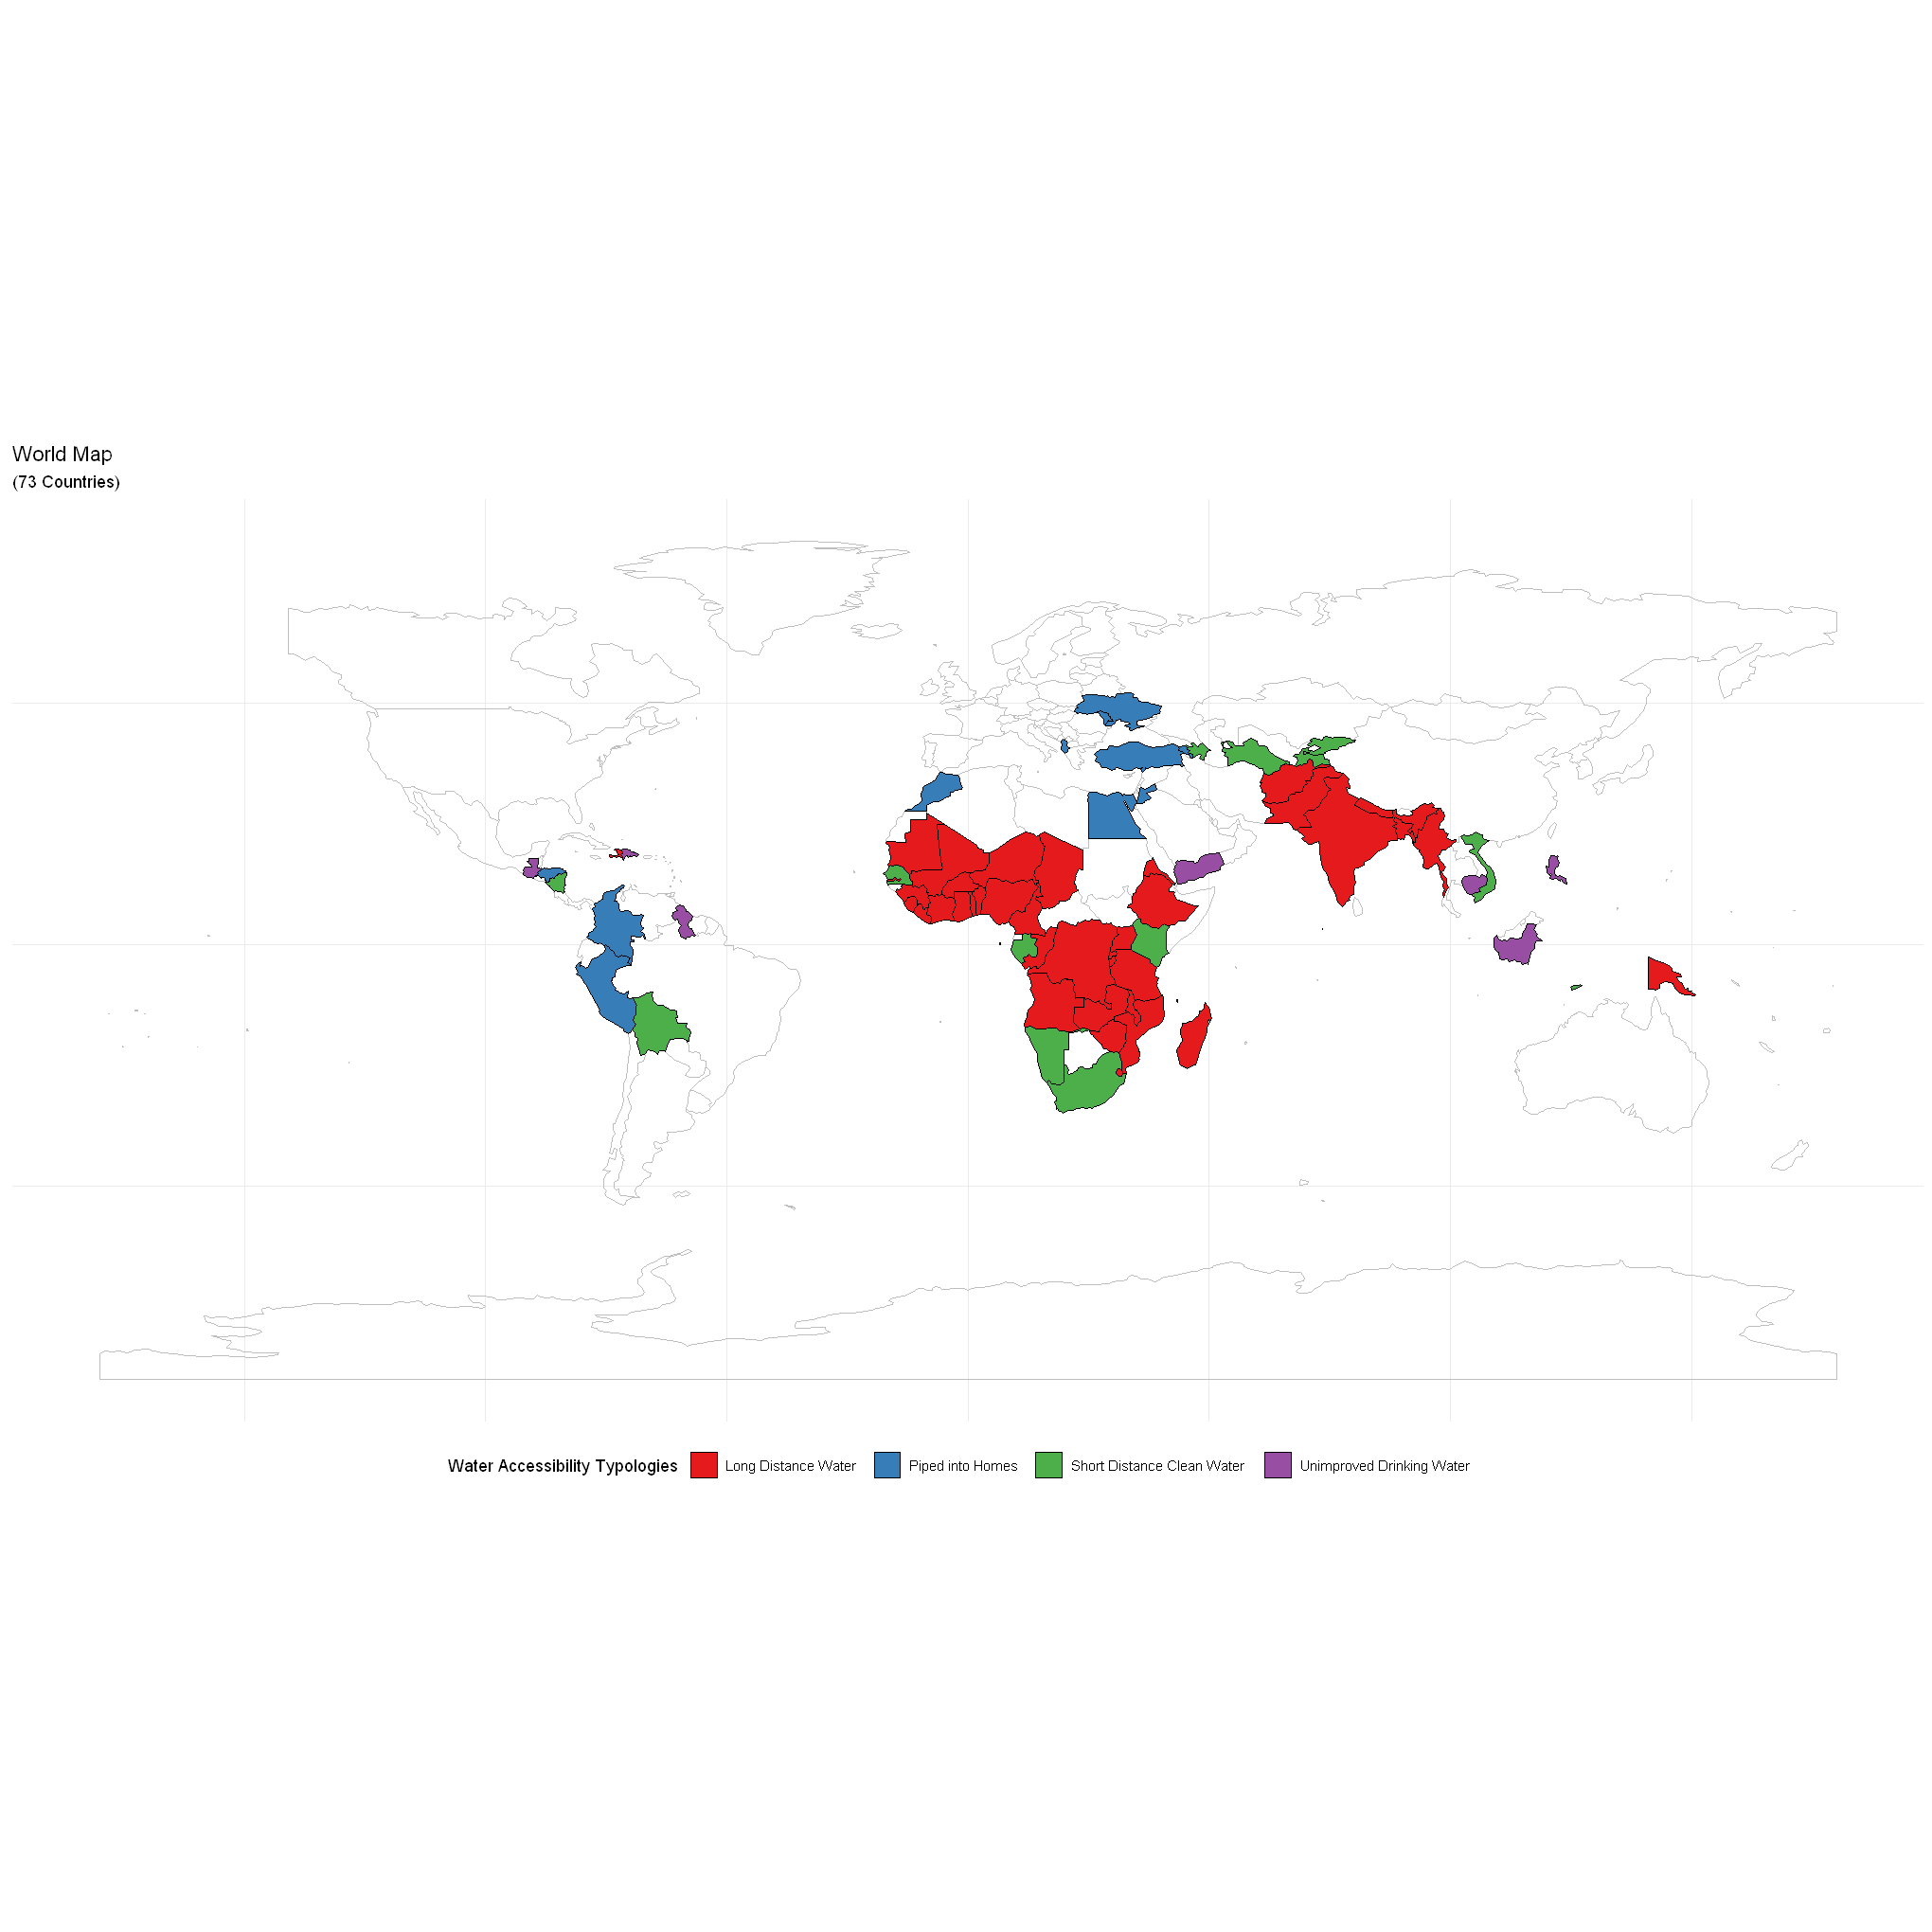

In [108]:
df = read_excel('../../results/df-fa-five-cluster-rank.xlsx') #change name of file to sth descriptive (e.g. country-clusters)
head(df)
df = df[, c(1,9)] # select only country name and cluster number
head(df,7)
colnames(df) = c('region', 'value') # change column names for ggplot
dim(df)
head(df)
# This is to convert country names in df to match those in the worldMap dataframe
coords <- joinCountryData2Map(df, joinCode = "NAME", nameJoinColumn = "region")
coords = data.frame(coords)
colnames(coords) = tolower(colnames(coords))
colnames(coords)
coords = drop_na(coords, value)
coords$name
setdiff(df$region,coords$name)

# Correct the country names in DF
df[df=='Timor-Leste'] = "East Timor"
df[df=='Central African Republic'] = "Central African Rep."
df[df=='Cote d\'Ivoire'] = "Ivory Coast"
df[df=='Dominican Republic'] = "Dominican Rep."
df[df=='Kyrgyz Republic'] = "Kyrgyzstan"
df[df=='Eswatini'] = "Swaziland"
df[df=='Congo'] = "Congo (Brazzaville)"
df[df=='Congo Democratic Republic'] = "Congo (Kinshasa)"

# Get world map data (lat/long)
countrynames = df$region
worldMap <- getMap()
country_indices <- which(worldMap$NAME%in%countrynames)

# Get coordinates for all countries to plot base map
allCoords <- lapply(seq(1,243), function(i){
  dfn <- data.frame(worldMap@polygons[[i]]@Polygons[[1]]@coords)
  dfn$region =as.character(worldMap$NAME[i])
  colnames(dfn) <- list("long", "lat", "region")
  return(dfn)
})
allCoords <- do.call("rbind", allCoords)

# Get coordinates strictly for those in water accessibility dataset
waterCoords <- lapply(country_indices, function(i){
  dfn <- data.frame(worldMap@polygons[[i]]@Polygons[[1]]@coords)
  dfn$region =as.character(worldMap$NAME[i])
  colnames(dfn) <- list("long", "lat", "region")
  return(dfn)
})

waterCoords <- do.call("rbind", waterCoords)
waterCoords$value <- df$value[match(waterCoords$region,df$region)]
waterCoords$value <- factor(waterCoords$value)

# Plot
options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=1)
ggplot() +
    geom_sf(color = "black", fill= 'antiquewhite') +
    xlab("Longitude") + ylab("Latitude") +
    geom_polygon(data= allCoords, mapping = aes(x =long, y=lat,group = region),color="grey",fill=NA) + 
    geom_polygon( data = waterCoords, mapping = aes(x =long, y=lat,group = region, fill=value), size=.3,color="black") +
    expand_limits(x = waterCoords$long, y = waterCoords$lat)  + 
    scale_fill_brewer(palette='Set1', name="Water Accessibility Typologies", na.value="grey", labels = c("Long Distance Water", "Piped into Homes", "Short Distance Clean Water","Unimproved Drinking Water ")) +  #labels = c())+
    ggtitle("World Map", subtitle = paste0("(", length(unique(df$region)), " Countries)")) +
    theme_minimal() +
    theme(legend.position = "bottom",
        axis.ticks = element_blank(), 
        axis.title = element_blank(), 
        axis.text =  element_blank()) 
#     #guides(fill = guide_colorbar(barwidth = 10, barheight = .5))


View a single RColorBrewer palette by specifying its name
display.brewer.pal(n = 8, name = 'Set1')
Set1 easy to see'#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00'
brewer.pal(n = 5, name = "Set1") # Best color scheme is Set1 